In [4]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd
import random
import math

In [5]:
# şehirlerin mesafelerinin python içine atılması adına yazılan cod

## !!! excel ile python dosyası aynı klasörün içerisinde kaydedilmiş olmalı



df_29_cities = pd.read_excel(r'Copy of 29 cities.xlsx', sheetname = '29 cities')
df_29_cities.index = df_29_cities['Index']
df_29_cities = df_29_cities.iloc[:,1:] 

df_42_cities = pd.read_excel(r'Copy of 29 cities.xlsx', sheetname = '42 cities')
df_42_cities.index = df_42_cities['Index']
df_42_cities = df_42_cities.iloc[:,1:]

df_76_cities = pd.read_excel(r'Copy of 29 cities.xlsx', sheetname = '76 cities')
df_76_cities.index = df_76_cities['Index']
df_76_cities = df_76_cities.iloc[:,1:]



'''şehirlerin listesi manuel olarak city-1, city-2 ismini excel'e girdik city-1 yerine ankara city-2 istanbulda
yazabilirdim tamamen arbitary'''



C:\ProgramData\Anaconda3\lib\site-packages\pandas\util\_decorators.py:188: FutureWarning: The `sheetname` keyword is deprecated, use `sheet_name` instead
  return func(*args, **kwargs)


"şehirlerin listesi manuel olarak city-1, city-2 ismini excel'e girdik city-1 yerine ankara city-2 istanbulda\nyazabilirdim tamamen arbitary"

In [9]:
'''çözüm başlangıcı başlangıç nearest neighbordhood methoodu ile başlayıp optimize etmek adına yapıldı'''

def initial_solution(Distances):
    import random
    Cities = list(Distances.columns)
    Distance_copy = Distances.copy()
    Cities_copy = Cities.copy()
    
    cur_city = random.choice(Cities_copy)  # start from a random city 
    solution = []
    solution.append(cur_city)
    free_cities = Cities_copy.copy() #başlangıç olarak şehiri rasgele seçtikten sonra free_cities kısmı geriye- 
#   kalan gidilmesi gereken şehirlerin listesi
    solution_distance = []
    while free_cities:
        a=0
        a+=1
        free_cities.remove(cur_city)  # gidilen şehirlere bir daha gidemeyiz siliyoruz
        next_city_dist = []
        for i in range(len(free_cities)):    
            next_city_dist.append(dist(Distance_copy, cur_city, free_cities[i]) ) ## gidebilecğimiz şehirler arasındaki-
            #mesefaleri buluyoruz ve listeye ekliyoruz bir sonraki adımda en yakın olan şehiri seçiceğiz
        
        for x in range(len(next_city_dist)):
            if min(next_city_dist) == next_city_dist[x]: # minumum olanı seçip o şehiri solution'a ekliyoruz -
                # istanbul ankara izmir random ist yi seçsem izmir daha yakın olduğu için izmiri ekliyorum gibi düşünebiliriz
                solution_distance.append(min(next_city_dist))
                break
        if len(free_cities)> 0:
            next_city = free_cities[x]                       
            solution.append(next_city)  
            cur_city = next_city
        else:
            break
    return solution, sum(solution_distance)  # en son gidilen şehirlerin sırasıyla listesi ve toplam mesefa initial solution-
    # olarak belirlenir
                        

In [10]:
initial_solution(df_29_cities) # görmek için var bu satır

(['City-29',
  'City-26',
  'City-5',
  'City-9',
  'City-6',
  'City-12',
  'City-28',
  'City-1',
  'City-21',
  'City-2',
  'City-20',
  'City-10',
  'City-4',
  'City-15',
  'City-18',
  'City-14',
  'City-22',
  'City-17',
  'City-11',
  'City-19',
  'City-16',
  'City-27',
  'City-24',
  'City-8',
  'City-23',
  'City-25',
  'City-7',
  'City-13',
  'City-3'],
 2279)

In [8]:
'''belirlenen herangi iki şehir arasındaki mesafeyi bulmak adına yazılan fonksiyon (
 (Distances) kısmı şehirler arasındaki mesafelerin verisini tutan tablo (Dataframe), city-1 ve city-2 de şehirlerin adı )'''
def dist(Distances, city_1 , city_2):
    distance = Distances.loc[city_1,city_2]
    return distance

In [68]:
def fitness(Distances, solution):
    """
    Total distance of the current solution path.
    """
    
    cur_fit = 0
    for i in range(len(solution)):
        cur_fit += dist(Distances, solution[i % (len(solution)-1)] , solution[(i + 1) % (len(solution)-1)]) 
    return cur_fit
    # bir sonraki aşamalara yardımcı olsun diye yazılan fonksiyon 
    # algoritmada random olarak hangi şehirlere hangi sıra ile gideceği değiştirilecek bu değişimler sonrası toplam gidilen-
    # mesefanenin ne kadar gideceğini hesaplıyor. ileri ki satırlarda simulated annualing algoritmasındaki sıcaklık değişimine-
    # göre bir olasılıkla kabul edip yada etmeyip en kısa olan toplam seyahet mesafesini anlamamıza yarıcak.
    # örneğin ankaradan istanbul, istanbuldan izmir, izmirden  ankaraya gittik bunun mesafesini ölç, bu sıralamayı değiştirince-
    # yeni sıralamanında mesafesini ölçücek (Sadece mesefe ölçüyor)

In [69]:
def reverse(Cities):
    reversed_Cities = []
    for i in range(len(Cities)-1,-1,-1):
        reversed_Cities.append(Cities[i])
    return reversed_Cities

In [70]:
def swap_cities(solution, index_a, index_b):
    """Compute the distance inferred by the two given indices."""
    index_A = min(index_a, index_b)
    index_B = max(index_a, index_b)
    new_solution = solution[:index_A] + reverse(solution[index_A:index_B]) + solution[index_B:]
    return new_solution

  

In [161]:
# temel kod burası daha öncekiler hep yardımcıydı, 

def anneal(Distances, alpha = 0.995, T=500, stopping_temperature = 1e-8,stopping_iter = 1000000000):
    
    history_candidate_fitness = []
    Cities = list(Distances.columns)
    #Algortimic Variables
    iteration = 0
    N = len(Cities)
    
    

    histroy_fit = []  # denenen her alternatifi kayıt ediyoruz
    histroy_sol = []
    
    # greedy solution (nearest neighbord hood'u burda çağırdık)
    cur_solution, cur_fitness = initial_solution(Distances)
    print(cur_solution)
    print(cur_fitness)
    
    best_solution = cur_solution.copy()
    best_fitness = cur_fitness
    
    history_candidate_fitness.append(cur_fitness)
    histroy_sol.append(best_solution)
    histroy_fit.append(best_fitness)
    
    print("Starting annealing.")
    
    x=1
    
    while T >= stopping_temperature and iteration < stopping_iter:
                
        x+=1
        if histroy_fit[-1] != best_fitness:
            histroy_sol.append(best_solution)
            histroy_fit.append(best_fitness)

        index = random.sample(range(len(cur_solution) - 1), 2)
        index[0] += 1
        index[1] += 1

        candidate_solution = cur_solution.copy()
        candidate_solution = swap_cities(candidate_solution, index[0], index[1])
        
        candidate_fitness = fitness(Distances, candidate_solution)
        
        history_candidate_fitness.append(candidate_fitness)
        
        diff_cur =    candidate_fitness - cur_fitness
        diff_best =   candidate_fitness - best_fitness

        #----------------------------------------------------------------
        if diff_cur < 0:
            cur_fitness, cur_solution = candidate_fitness, candidate_solution.copy()
            if diff_best < 0:
                best_fitness, best_solution = candidate_fitness, candidate_solution
        else:
            if math.exp( -diff_cur / T ) > random.random():
                cur_fitness, cur_solution = candidate_fitness, candidate_solution
        #--------------------------------------------------------------------------

            
        T *= alpha
        iteration += 1
    return histroy_sol,histroy_fit, best_solution, best_fitness,x,history_candidate_fitness

In [128]:
anneal(df_29_cities, alpha = 0.995, T=500, stopping_temperature = 1e-8,stopping_iter = 100000)

['City-25', 'City-19', 'City-15', 'City-4', 'City-10', 'City-20', 'City-2', 'City-21', 'City-1', 'City-28', 'City-6', 'City-12', 'City-9', 'City-5', 'City-26', 'City-29', 'City-3', 'City-13', 'City-24', 'City-27', 'City-8', 'City-16', 'City-23', 'City-7', 'City-11', 'City-22', 'City-14', 'City-18', 'City-18']
2147
Starting annealing.


([['City-25',
   'City-19',
   'City-15',
   'City-4',
   'City-10',
   'City-20',
   'City-2',
   'City-21',
   'City-1',
   'City-28',
   'City-6',
   'City-12',
   'City-9',
   'City-5',
   'City-26',
   'City-29',
   'City-3',
   'City-13',
   'City-24',
   'City-27',
   'City-8',
   'City-16',
   'City-23',
   'City-7',
   'City-11',
   'City-22',
   'City-14',
   'City-18',
   'City-18']],
 [2147],
 ['City-25',
  'City-19',
  'City-15',
  'City-4',
  'City-10',
  'City-20',
  'City-2',
  'City-21',
  'City-1',
  'City-28',
  'City-6',
  'City-12',
  'City-9',
  'City-5',
  'City-26',
  'City-29',
  'City-3',
  'City-13',
  'City-24',
  'City-27',
  'City-8',
  'City-16',
  'City-23',
  'City-7',
  'City-11',
  'City-22',
  'City-14',
  'City-18',
  'City-18'],
 2147,
 4915)

In [129]:
anneal(df_42_cities, alpha = 0.995, T=500, stopping_temperature = 1e-8,stopping_iter = 100000)

['City-33', 'City-32', 'City-31', 'City-30', 'City-28', 'City-29', 'City-26', 'City-27', 'City-24', 'City-25', 'City-10', 'City-9', 'City-8', 'City-7', 'City-6', 'City-5', 'City-4', 'City-3', 'City-40', 'City-39', 'City-38', 'City-37', 'City-35', 'City-34', 'City-36', 'City-41', 'City-1', 'City-42', 'City-2', 'City-11', 'City-12', 'City-23', 'City-22', 'City-21', 'City-20', 'City-19', 'City-18', 'City-16', 'City-17', 'City-13', 'City-14', 'City-14']
782
Starting annealing.


([['City-33',
   'City-32',
   'City-31',
   'City-30',
   'City-28',
   'City-29',
   'City-26',
   'City-27',
   'City-24',
   'City-25',
   'City-10',
   'City-9',
   'City-8',
   'City-7',
   'City-6',
   'City-5',
   'City-4',
   'City-3',
   'City-40',
   'City-39',
   'City-38',
   'City-37',
   'City-35',
   'City-34',
   'City-36',
   'City-41',
   'City-1',
   'City-42',
   'City-2',
   'City-11',
   'City-12',
   'City-23',
   'City-22',
   'City-21',
   'City-20',
   'City-19',
   'City-18',
   'City-16',
   'City-17',
   'City-13',
   'City-14',
   'City-14'],
  ['City-33',
   'City-32',
   'City-34',
   'City-35',
   'City-36',
   'City-37',
   'City-38',
   'City-39',
   'City-40',
   'City-41',
   'City-42',
   'City-2',
   'City-1',
   'City-4',
   'City-3',
   'City-9',
   'City-10',
   'City-12',
   'City-11',
   'City-17',
   'City-13',
   'City-14',
   'City-16',
   'City-18',
   'City-19',
   'City-20',
   'City-21',
   'City-22',
   'City-23',
   'City-24',
   'C

In [96]:
anneal(df_76_cities, alpha = 0.995, T=5000, stopping_temperature = 1e-8,stopping_iter = 100000)

['City-50', 'City-18', 'City-25', 'City-55', 'City-9', 'City-39', 'City-72', 'City-58', 'City-10', 'City-38', 'City-65', 'City-11', 'City-66', 'City-53', 'City-14', 'City-19', 'City-35', 'City-7', 'City-8', 'City-46', 'City-34', 'City-52', 'City-27', 'City-45', 'City-29', 'City-48', 'City-47', 'City-21', 'City-74', 'City-28', 'City-62', 'City-73', 'City-1', 'City-43', 'City-41', 'City-42', 'City-64', 'City-22', 'City-61', 'City-69', 'City-36', 'City-71', 'City-60', 'City-70', 'City-20', 'City-37', 'City-5', 'City-15', 'City-57', 'City-13', 'City-54', 'City-67', 'City-76', 'City-75', 'City-68', 'City-6', 'City-51', 'City-17', 'City-12', 'City-40', 'City-32', 'City-44', 'City-3', 'City-16', 'City-63', 'City-33', 'City-2', 'City-30', 'City-4', 'City-26', 'City-49', 'City-24', 'City-23', 'City-56', 'City-31']
645
Starting annealing.


([['City-50',
   'City-18',
   'City-25',
   'City-55',
   'City-9',
   'City-39',
   'City-72',
   'City-58',
   'City-10',
   'City-38',
   'City-65',
   'City-11',
   'City-66',
   'City-53',
   'City-14',
   'City-19',
   'City-35',
   'City-7',
   'City-8',
   'City-46',
   'City-34',
   'City-52',
   'City-27',
   'City-45',
   'City-29',
   'City-48',
   'City-47',
   'City-21',
   'City-74',
   'City-28',
   'City-62',
   'City-73',
   'City-1',
   'City-43',
   'City-41',
   'City-42',
   'City-64',
   'City-22',
   'City-61',
   'City-69',
   'City-36',
   'City-71',
   'City-60',
   'City-70',
   'City-20',
   'City-37',
   'City-5',
   'City-15',
   'City-57',
   'City-13',
   'City-54',
   'City-67',
   'City-76',
   'City-75',
   'City-68',
   'City-6',
   'City-51',
   'City-17',
   'City-12',
   'City-40',
   'City-32',
   'City-44',
   'City-3',
   'City-16',
   'City-63',
   'City-33',
   'City-2',
   'City-30',
   'City-4',
   'City-26',
   'City-49',
   'City-24',
 

In [133]:
def plot_learning(best_solution, histroy_fit):

    plt.plot([i for i in range(len(histroy_fit))], histroy_fit)
    plt.title('Plot the fitness through iterations for '+str(len(best_solution))+' cities')
    plt.ylabel("Fitness")
    plt.xlabel("Number of Best Solution Change")
    plt.show()

In [166]:
def plot_all_iterations(x,history_candidate_fitness):

    plt.plot([i for i in range(x)], history_candidate_fitness)
    plt.title('Plot the fitness through iterations for '+str(len(history_candidate_fitness))+' iterations')
    plt.ylabel("Fitness")
    plt.xlabel("Iterations")
    plt.show()

In [162]:
histroy_sol_29,histroy_fit_29, best_solution_29, best_fitness_29,number_of_iterations_29,history_candidate_fitness_29 = anneal(df_29_cities, alpha = 0.995, T=500, stopping_temperature = 1e-8,stopping_iter = 100000)
histroy_sol_42,histroy_fit_42, best_solution_42, best_fitness_42,number_of_iterations_42,history_candidate_fitness_42 = anneal(df_42_cities, alpha = 0.997, T=500, stopping_temperature = 1e-8,stopping_iter = 100000)
histroy_sol_76,histroy_fit_76, best_solution_76, best_fitness_76,number_of_iterations_76,history_candidate_fitness_76 = anneal(df_76_cities, alpha = 0.998, T=50000, stopping_temperature = 1e-8,stopping_iter = 100000)

['City-14', 'City-18', 'City-15', 'City-4', 'City-10', 'City-20', 'City-2', 'City-21', 'City-1', 'City-28', 'City-6', 'City-12', 'City-9', 'City-5', 'City-26', 'City-29', 'City-3', 'City-13', 'City-24', 'City-27', 'City-8', 'City-16', 'City-19', 'City-25', 'City-7', 'City-23', 'City-11', 'City-22', 'City-22']
2234
Starting annealing.
['City-23', 'City-22', 'City-21', 'City-20', 'City-19', 'City-18', 'City-16', 'City-17', 'City-13', 'City-14', 'City-15', 'City-12', 'City-11', 'City-10', 'City-25', 'City-24', 'City-27', 'City-26', 'City-28', 'City-29', 'City-30', 'City-31', 'City-32', 'City-33', 'City-34', 'City-35', 'City-37', 'City-38', 'City-39', 'City-40', 'City-5', 'City-4', 'City-3', 'City-8', 'City-9', 'City-7', 'City-6', 'City-36', 'City-41', 'City-1', 'City-42', 'City-42']
746
Starting annealing.
['City-4', 'City-75', 'City-76', 'City-67', 'City-34', 'City-46', 'City-8', 'City-35', 'City-7', 'City-53', 'City-14', 'City-19', 'City-54', 'City-13', 'City-27', 'City-52', 'City-45', 

In [163]:
number_of_iterations_76

14607

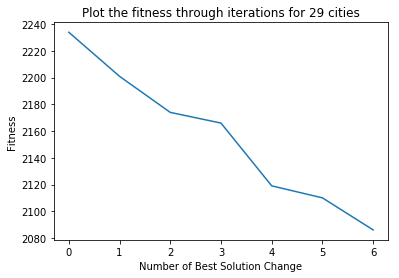

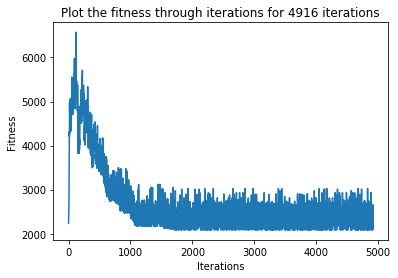

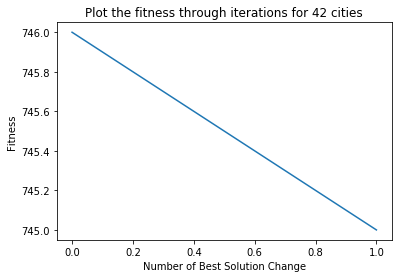

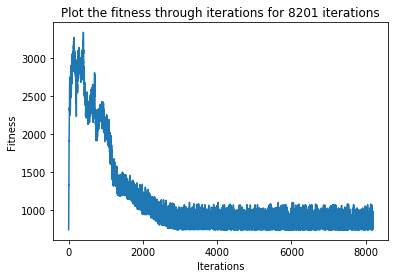

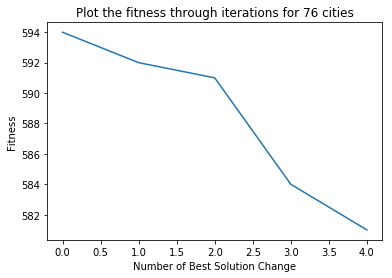

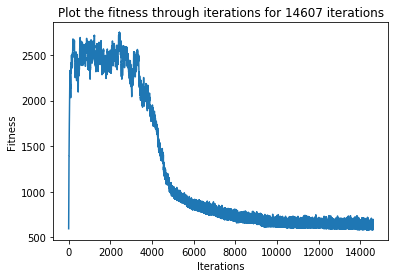

In [168]:
plot_learning(best_solution_29, histroy_fit_29)
plot_all_iterations(number_of_iterations_29,history_candidate_fitness_29)
plot_learning(best_solution_42, histroy_fit_42)
plot_all_iterations(number_of_iterations_42,history_candidate_fitness_42)
plot_learning(best_solution_76, histroy_fit_76)
plot_all_iterations(number_of_iterations_76,history_candidate_fitness_76)

In [165]:
histroy_fit_76

[594, 592, 591, 584, 581]

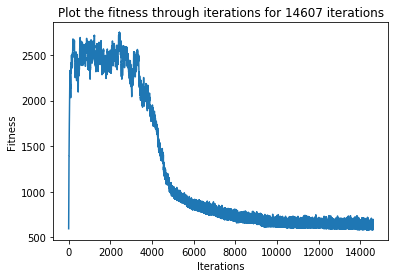